In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### `Preprocesamiento de datos`


---



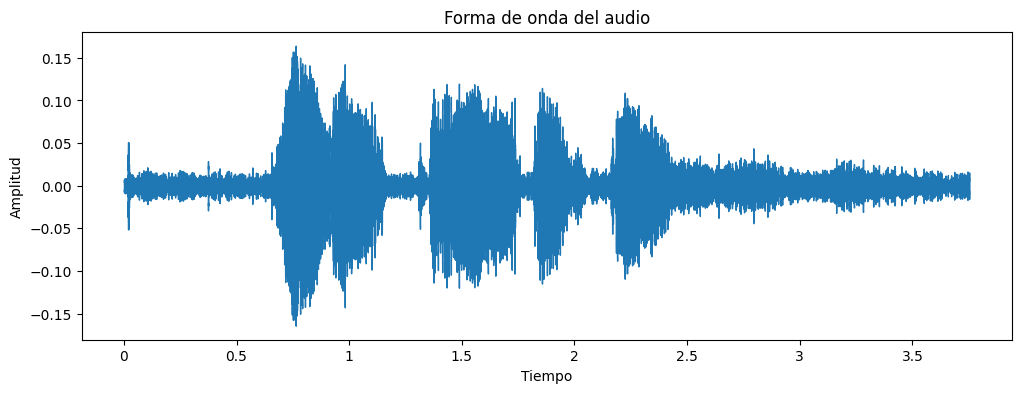

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Cargar archivo de audio
audio_path = '/content/drive/MyDrive/MIT/speech-recognition/random_audio2.wav'

signal, sample_rate = librosa.load(audio_path)

# Visualizar forma de onda del audio
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Forma de onda del audio')
plt.show()


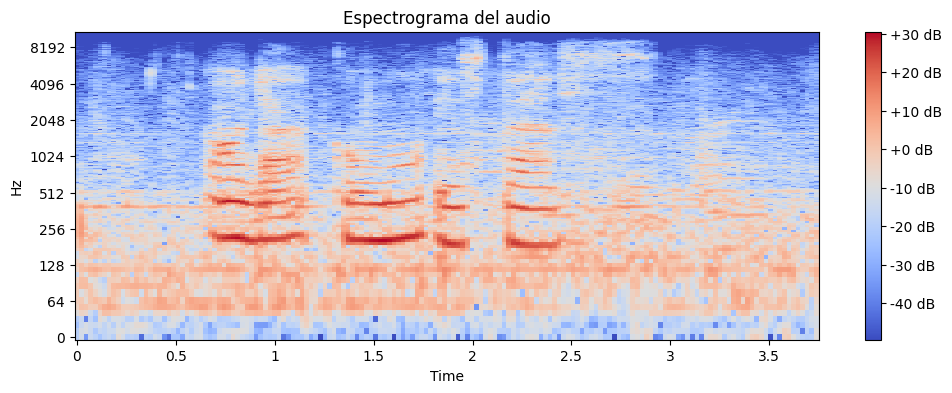

In [3]:
# Aplicar transformada de Fourier de corto tiempo (STFT)
stft = librosa.stft(signal)
spectrogram = librosa.amplitude_to_db(abs(stft))

# Visualizar espectrograma
plt.figure(figsize=(12, 4))
librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del audio')
plt.show()


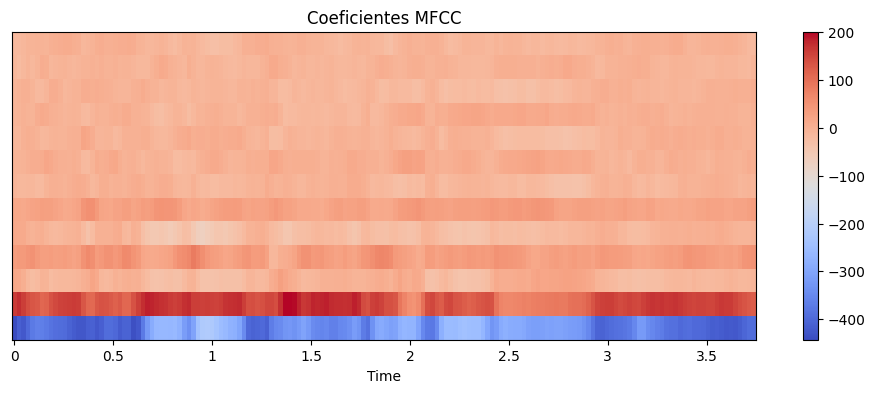

In [4]:
# Calcular coeficientes MFCC
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)

# Visualizar coeficientes MFCC
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Coeficientes MFCC')
plt.show()



### `Segmentación y etiquetado`


---



In [5]:
import librosa
import numpy as np

# Función para analizar la duración y el salto de segmento óptimos
def analizar_segmentacion(audio_path, segment_duration_range, segment_hop_range):
    # Cargar archivo de audio
    signal, sample_rate = librosa.load(audio_path)

    # Inicializar variables para almacenar los mejores parámetros
    mejor_segment_duration = 0
    mejor_segment_hop = 0
    mejor_score = float('-inf')

    # Realizar análisis para diferentes combinaciones de duración y salto de segmento
    for segment_duration in segment_duration_range:
        for segment_hop in segment_hop_range:
            # Convertir duración y salto a número de muestras
            segment_samples = int(segment_duration * sample_rate)
            hop_samples = int(segment_hop * sample_rate)

            # Segmentar el audio
            segments = []
            for start in range(0, len(signal) - segment_samples + 1, hop_samples):
                end = start + segment_samples
                segment = signal[start:end]
                segments.append(segment)

            # Realizar análisis de los segmentos (puedes aplicar tu propio análisis aquí)
            # Calcula un score para evaluar la calidad de la segmentación
            score = len(segments)  # Ejemplo: simplemente usar la cantidad de segmentos como score

            # Actualizar los mejores parámetros si se encuentra un score mejor
            if score > mejor_score:
                mejor_score = score
                mejor_segment_duration = segment_duration
                mejor_segment_hop = segment_hop

    # Devolver los mejores parámetros encontrados
    return mejor_segment_duration, mejor_segment_hop

# Definir rango de duración y salto de segmento a analizar
segment_duration_range = np.linspace(0.1, 1.0, 10)  # Rango de duración de segmento de 0.1 a 1.0 segundos
segment_hop_range = np.linspace(0.01, 0.1, 10)  # Rango de salto de segmento de 0.01 a 0.1 segundos



# Obtener los mejores parámetros de segmentación
mejor_segment_duration, mejor_segment_hop = analizar_segmentacion(audio_path, segment_duration_range, segment_hop_range)

# Imprimir los mejores parámetros encontrados
print("Mejor duración de segmento:", mejor_segment_duration)
print("Mejor salto de segmento:", mejor_segment_hop)


Mejor duración de segmento: 0.1
Mejor salto de segmento: 0.01


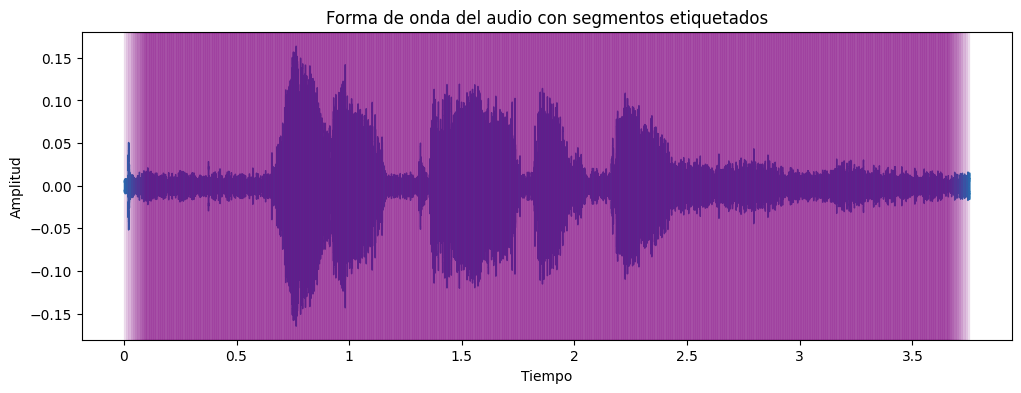

In [6]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
# No tomar en cuenta por el momento
#mejor_segment_duration = 0.1
#mejor_segment_hop = 0.01

# Convertir duración y salto a número de muestras
segment_samples = int(mejor_segment_duration * sample_rate)
hop_samples = int(mejor_segment_hop * sample_rate)

# Segmentar el audio con un margen de error pequeño
segments = []
for start in range(0, len(signal) - segment_samples + 1, hop_samples):
    end = start + segment_samples
    segment = signal[start:end]
    segments.append(segment)

# Etiquetar los segmentos con un margen de error pequeño
labels = ['inicio', 'desarrollo', 'final']  # Etiquetas correspondientes a cada segmento

# Crear arreglo de etiquetas numéricas
label_dict = {label: i for i, label in enumerate(set(labels))}
numeric_labels = np.array([label_dict[label] for label in labels])

# Visualizar forma de onda y segmentos etiquetados
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sample_rate)
for i, segment in enumerate(segments):
    plt.axvspan(i * hop_samples / sample_rate, i * hop_samples / sample_rate + mejor_segment_duration, alpha=0.1, color='purple')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Forma de onda del audio con segmentos etiquetados')
plt.show()


In [7]:
#for i, segment in enumerate(segments):
    #print("Segmento:", segment)
    #print("Etiqueta:", numeric_labels[i])

for i, segment in enumerate(numeric_labels):
    print("Segmento:", segment)
    print("Etiqueta:", numeric_labels[i])

Segmento: 2
Etiqueta: 2
Segmento: 0
Etiqueta: 0
Segmento: 1
Etiqueta: 1


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# Construir el modelo de red neuronal
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(None, mfccs.shape[1])))
model.add(LSTM(128))
model.add(Dense(len(label_dict), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Verificar si la cantidad de segmentos coincide con la cantidad de etiquetas
if len(segments) != len(numeric_labels):
    print("La cantidad de segmentos y etiquetas no coincide.")

else:
      # Entrenar el modelo
      model.fit(np.array(segments), numeric_labels, epochs=10, batch_size=32)

      # Realizar predicciones con el modelo
      predictions = model.predict(np.array(segments))



La cantidad de segmentos y etiquetas no coincide.


### `Redes neuronales recurrentes (RNN)`


---



modificar luego



In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

# Crear modelo de red neuronal
model = Sequential()
model.add(LSTM(64, input_shape=(segment_samples, 1)))  # Capa LSTM con 64 unidades
model.add(Dense(len(set(numeric_labels)), activation='softmax'))  # Capa de salida con activación softmax


# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convertir segmentos a formato adecuado para la entrada de la red neuronal
segments = np.expand_dims(np.array(segments), axis=-1)


'''
  import tensorflow as tf

  data_list = tf.stack(data_list)
  y = tf.stack(y)
'''
import tensorflow as tf
segments = tf.stack(segments)
numeric_labels = tf.stack(numeric_labels)

print(segments.shape, " ", numeric_labels)

# Entrenar el modelo
#model.fit(segments, numeric_labels, epochs=10, batch_size=32)
'''
# Para predecir las etiquetas de nuevos segmentos de audio:
new_segments = ...  # Obtén los nuevos segmentos de audio
new_segments = np.expand_dims(np.array(new_segments), axis=-1)
predictions = model.predict(new_segments)

# Obtener las etiquetas predichas
predicted_labels = [list(label_dict.keys())[np.argmax(prediction)] for prediction in predictions]'''

TypeError: ignored

### `Speech recognition`


---


```
pip install SpeechRecognition
```




In [11]:
import speech_recognition as sr

# Crear un objeto de reconocimiento de voz
recognizer = sr.Recognizer()

# Cargar el archivo de audio
audio_path = '/content/drive/MyDrive/MIT/speech-recognition/random_audio2.wav'
with sr.AudioFile(audio_path) as source:
    # Leer el audio del archivo
    audio = recognizer.record(source)

    # Realizar reconocimiento de voz utilizando Google Speech Recognition
    try:
        text = recognizer.recognize_google(audio)
        print("Texto reconocido:", text)
    except sr.UnknownValueError:
        print("No se pudo reconocer el audio")
    except sr.RequestError as e:
        print("Error al realizar la solicitud al servicio de reconocimiento de voz:", str(e))




audio_path = '/content/drive/MyDrive/MIT/speech-recognition/random_audio2.wav'


Texto reconocido: hola como estas


### `Training model`


---


In [32]:
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Cargar archivo de audio
audio_path = '/content/drive/MyDrive/MIT/speech-recognition/random_audio1.wav'
signal, sample_rate = librosa.load(audio_path)

# Extraer características MFCC
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=3)  # Utilizar 13 coeficientes MFCC

# Extraer otras características (ejemplo)
# spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sample_rate)
# zero_crossing_rate = librosa.feature.zero_crossing_rate(y=signal)

# Concatenar las características en una matriz de características
features = mfccs.T  # Asegúrate de tener las dimensiones adecuadas para tu caso específico
print(features.shape)

# Cargar etiquetas de entrenamiento
# Por ejemplo, 'habla', 'música', 'sonido de fondo' --> de momento solo se entrenara para diferenciar musica, hablar o sonido de fondo
labels = ['habla', 'musica', 'sonido de fondo'] * 5094 # Asegúrate de tener la misma cantidad de etiquetas que de segmentos de audio
print(len(labels))
# Crear un clasificador de bosques aleatorios
classifier = RandomForestClassifier()

# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Entrenar el clasificador
classifier.fit(scaled_features, labels)

# Clasificar el audio de prueba
# Cargar archivo de audio de prueba
test_audio_path = '/content/drive/MyDrive/MIT/speech-recognition/random_audio2.wav' #podcast
test_signal, test_sample_rate = librosa.load(test_audio_path)

# Extraer características del audio de prueba
test_mfccs = librosa.feature.mfcc(y=test_signal, sr=test_sample_rate, n_mfcc=3)  # Utilizar 13 coeficientes MFCC

# Concatenar las características en una matriz de características para el audio de prueba
test_features = test_mfccs.T  # Asegúrate de tener las dimensiones adecuadas para tu caso específico

# Escalar las características del audio de prueba
scaled_test_features = scaler.transform(test_features)

# Clasificar el audio de prueba utilizando el clasificador entrenado
predicted_labels = classifier.predict(scaled_test_features)

# Imprimir las etiquetas predichas para el audio de prueba
print(predicted_labels)


(15282, 3)
15282
['sonido de fondo' 'sonido de fondo' 'musica' 'habla' 'sonido de fondo'
 'sonido de fondo' 'sonido de fondo' 'musica' 'musica' 'habla' 'musica'
 'musica' 'musica' 'musica' 'musica' 'sonido de fondo' 'sonido de fondo'
 'habla' 'sonido de fondo' 'habla' 'habla' 'musica' 'musica' 'habla'
 'sonido de fondo' 'sonido de fondo' 'sonido de fondo' 'musica'
 'sonido de fondo' 'musica' 'sonido de fondo' 'habla' 'sonido de fondo'
 'sonido de fondo' 'sonido de fondo' 'musica' 'sonido de fondo' 'habla'
 'musica' 'musica' 'musica' 'sonido de fondo' 'sonido de fondo'
 'sonido de fondo' 'musica' 'musica' 'sonido de fondo' 'sonido de fondo'
 'habla' 'habla' 'musica' 'habla' 'sonido de fondo' 'habla' 'habla'
 'sonido de fondo' 'habla' 'musica' 'sonido de fondo' 'musica' 'musica'
 'sonido de fondo' 'sonido de fondo' 'habla' 'musica' 'sonido de fondo'
 'sonido de fondo' 'sonido de fondo' 'sonido de fondo' 'sonido de fondo'
 'sonido de fondo' 'sonido de fondo' 'sonido de fondo' 'sonido de f